

# Project: Investigate a Dataset - [FBI-Gun-Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


>In this project, we will analyze the data coming from the FBI's National Instant Criminal Background Check System. The NICS is used by Federal Firearms Licensees (FFLs) to determine whether a prospective buyer is eligible to buy firearms. 
Before ringing up the sale, cashiers call in a check to the FBI or to other designated agencies to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. More than 100 million such checks have been made in the last decade, leading to more than 700,000 denials.

>- [The NICS data](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a4db8_gun-data/gun-data.xlsx&sa=D&source=editors&ust=1633594300042000&usg=AOvVaw29GvDtCZqtqB8kXr970ovO) is found in one sheet of an .xlsx file. It contains the number of firearm checks by month, state, and type.
- [The U.S. census data](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a554c_u.s.-census-data/u.s.-census-data.csv&sa=D&source=editors&ust=1633594300042000&usg=AOvVaw17AflEDgUS9fG6RjwJrkAf) is found in a .csv file. It contains several variables at the state level. Most variables just have one data point per state (2016), but a few have data for more than one year.

**Notes** regarding the US Census Data File:
>**Fact Notes**	
- a:	Includes persons reporting only one race
- b:	Hispanics may be of any race, so also are included in applicable race categories
- c:	Economic Census - Puerto Rico data are not comparable to U.S. Economic Census data

>**Value Flags**	
- \-:    Either no or too few sample observations were available to compute an estimate, or a ratio of medians cannot be calculated because one or both of the median estimates falls in the lowest or upper interval of an open ended distribution.
-  D:	Suppressed to avoid disclosure of confidential information
- F:	Fewer than 25 firms
- FN:	Footnote on this item in place of data
- NA:	Not available
- S:	Suppressed; does not meet publication standards
- X:	Not applicable
- Z:	Value greater than zero but less than half unit of measure shown




### Questions for Analysis


>- Which states have had the highest growth in gun registrations?
- What is the type of gun that is most purchased?
- What is the overall trend of gun purchases?
- Is there a relation between gun types and population type?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we will load in the data, check for cleanliness, and then trim and clean our dataset for analysis.


### Loading  data and printing out a few lines. 

In [2]:
df_census = pd.read_csv('US_Census_Data.csv')
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [3]:
df_gun = pd.read_excel('gun_data.xlsx')
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


### Performing operations on US Census Data to inspect data types and look for instances of missing or possibly errant data.

In [4]:
# operations on US Census Data
df_census.shape

(85, 52)

In [5]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

In [6]:
df_census.nunique()

Fact              80
Fact Note         15
Alabama           65
Alaska            64
Arizona           64
Arkansas          64
California        63
Colorado          64
Connecticut       63
Delaware          64
Florida           64
Georgia           64
Hawaii            63
Idaho             63
Illinois          65
Indiana           63
Iowa              65
Kansas            65
Kentucky          65
Louisiana         65
Maine             64
Maryland          64
Massachusetts     65
Michigan          64
Minnesota         65
Mississippi       65
Missouri          64
Montana           65
Nebraska          65
Nevada            63
New Hampshire     65
New Jersey        65
New Mexico        64
New York          65
North Carolina    65
North Dakota      63
Ohio              64
Oklahoma          64
Oregon            63
Pennsylvania      65
Rhode Island      64
South Carolina    65
South Dakota      65
Tennessee         64
Texas             64
Utah              64
Vermont           63
Virginia     

In [7]:
df_census.duplicated().sum()

3

In [8]:
df_census.isnull().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

### After inspecting the US Census data we found the following:
>- the 'Fact Note' column has no significant effect on the overall analysis.
- There are extra rows at the end of the file that describe the database.
- The states are on the label row.
- There are values as a percent and other values without percent in the same row.
- The values of the database are strings not floats.
- There are 4 values of (Z) which corresponds to: Value greater than zero but less than half unit of measure shown
- There are 1 value of (FN) which corresponds to: Footnote on this item in place of data
- There are 2 values of (D) which corresponds to: Suppressed to avoid disclosure of confidential information


### Data Cleaning for US Census Data:

 

In [9]:
# drop columns from US census dataset
df_census.drop(['Fact Note'], axis=1, inplace=True)

# confirm changes
df_census.head(1)

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"


In [10]:
# remove extra rows from US Census Data file
df_census.drop(df_census.index[65:], inplace=True)

# confirm changes
df_census.shape

(65, 51)

In [11]:
# remove commas, and $ from values to be able to convert to floats
for col in df_census.columns:
    df_census[col] = df_census[col].str.replace(',', '')
    df_census[col] = df_census[col].str.replace('$', '')
    df_census[col] = df_census[col].str.replace('"', '')

In [12]:
# value flags' count in the data
print(df_census.where(df_census == 'FN').count().sum())
print(df_census.where(df_census == 'D').count().sum())
print(df_census.where(df_census == 'Z').count().sum())
print(df_census.where(df_census == 'NA').count().sum())
print(df_census.where(df_census == 'S').count().sum())
print(df_census.where(df_census == 'X').count().sum())
print(df_census.where(df_census == 'F').count().sum())
print(df_census.where(df_census == '-').count().sum())

1
2
4
0
0
0
0
0


In [13]:
# Z values are less than half unit of measure shown so it will be neglected
df_census.replace({'Z': 0}, inplace=True)

print(df_census.where(df_census == 'Z').count().sum())

0


In [14]:
# 'FN' and 'D' values will be NaN values then replaced by the mean of corresponding column
df_census.replace({'FN': None, 'D': None}, inplace=True)

df_census.isnull().sum().sum()

3

In [15]:
# to get list of rows in dataset that contains the '%'
df_cen_percent = df_census[df_census[col].str.contains("%") == True]
print(list(df_cen_percent.index))

[2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 24, 32, 33, 34, 35, 36, 37, 38, 39, 49]


In [16]:
# to get from list of columns in dataset that contains the '%'
# from Alabama to Alaska [1:30] and from Texas to Wyoming [43:50]
df_census.iloc[2]

Fact              Population percent change - April 1 2010 (esti...
Alabama                                                       1.70%
Alaska                                                        4.50%
Arizona                                                       8.40%
Arkansas                                                      2.50%
California                                                    5.40%
Colorado                                                     10.20%
Connecticut                                                   0.10%
Delaware                                                      6.00%
Florida                                                       9.60%
Georgia                                                       6.40%
Hawaii                                                        5.00%
Idaho                                                         7.40%
Illinois                                                     -0.20%
Indiana                                         

In [17]:
# View the index number and label for each column
for i, v in enumerate(df_census.columns):
    print(i, v)

0 Fact
1 Alabama
2 Alaska
3 Arizona
4 Arkansas
5 California
6 Colorado
7 Connecticut
8 Delaware
9 Florida
10 Georgia
11 Hawaii
12 Idaho
13 Illinois
14 Indiana
15 Iowa
16 Kansas
17 Kentucky
18 Louisiana
19 Maine
20 Maryland
21 Massachusetts
22 Michigan
23 Minnesota
24 Mississippi
25 Missouri
26 Montana
27 Nebraska
28 Nevada
29 New Hampshire
30 New Jersey
31 New Mexico
32 New York
33 North Carolina
34 North Dakota
35 Ohio
36 Oklahoma
37 Oregon
38 Pennsylvania
39 Rhode Island
40 South Carolina
41 South Dakota
42 Tennessee
43 Texas
44 Utah
45 Vermont
46 Virginia
47 Washington
48 West Virginia
49 Wisconsin
50 Wyoming


In [18]:
# subset dataframe with '%' sign 
df_cen_percent = df_census.iloc[np.r_[2, 4:20, 21, 24, 32:40, 49, 53], np.r_[1:31, 43:51]]
df_cen_percent.head(29)

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,New Hampshire,New Jersey,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,6.40%,...,1.40%,1.70%,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
4,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,6.40%,...,4.80%,5.80%,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,5.70%,7.10%,...,5.30%,6.20%,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,20.10%,24.40%,...,19.50%,22.20%,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,21.30%,25.70%,...,21.80%,23.50%,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,19.90%,13.10%,...,17.00%,15.30%,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,17.30%,10.70%,...,13.50%,13.50%,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%
10,51.60%,47.70%,50.30%,50.90%,50.30%,49.70%,51.20%,51.60%,51.10%,51.30%,...,50.50%,51.20%,50.40%,49.70%,50.60%,50.80%,50.00%,50.50%,50.30%,48.90%
11,51.50%,48.00%,50.30%,50.90%,50.30%,49.90%,51.30%,51.60%,51.10%,51.20%,...,50.70%,51.30%,50.40%,49.80%,50.70%,50.90%,50.20%,50.70%,50.40%,49.00%
12,69.30%,66.10%,83.30%,79.40%,72.70%,87.50%,80.60%,70.10%,77.60%,61.20%,...,93.80%,72.40%,79.40%,91.10%,94.60%,70.00%,80.00%,93.60%,87.50%,92.80%


In [19]:
# remove '%' from values and convert to floats
for col in df_cen_percent.columns:
    df_cen_percent[col] = df_cen_percent[col].str.rstrip('%').astype('float') / 100

In [20]:
# update dataframe to reflect changes in df_cen_percent
df_census.update(df_cen_percent)
df_census.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Population estimates July 1 2016 (V2016),4863300,741894,6931071,2988248,39250017,5540545,3576452,952065,20612439,...,865454,6651194,27862596,3051217,624594,8411808,7288000,1831102,5778708,585501
1,Population estimates base April 1 2010 (V2016),4780131,710249,6392301,2916025,37254522,5029324,3574114,897936,18804592,...,814195,6346298,25146100,2763888,625741,8001041,6724545,1853011,5687289,563767
2,Population percent change - April 1 2010 (esti...,0.017,0.045,0.084,0.025,0.054,0.102,0.001,0.06,0.096,...,0.063,0.048,0.108,0.104,-0.002,0.051,0.084,-0.012,0.016,0.039
3,Population Census April 1 2010,4779736,710231,6392017,2915918,37253956,5029196,3574097,897934,18801310,...,814180,6346105,25145561,2763885,625741,8001024,6724540,1852994,5686986,563626
4,Persons under 5 years percent July 1 2016 (V2...,0.06,0.073,0.063,0.064,0.063,0.061,0.052,0.058,0.055,...,0.071,0.061,0.072,0.083,0.049,0.061,0.062,0.055,0.058,0.065


In [21]:
# transpose dataframe to make each row for a state
df_census.set_index('Fact',inplace=True)
df_census = df_census.transpose().reset_index()

In [22]:
# rename the states' column to 'State'
df_census.rename(columns={'index':'State'},inplace = True)

# confirm changes
df_census.head(1)

Fact,State,Population estimates July 1 2016 (V2016),Population estimates base April 1 2010 (V2016),Population percent change - April 1 2010 (estimates base) to July 1 2016 (V2016),Population Census April 1 2010,Persons under 5 years percent July 1 2016 (V2016),Persons under 5 years percent April 1 2010,Persons under 18 years percent July 1 2016 (V2016),Persons under 18 years percent April 1 2010,Persons 65 years and over percent July 1 2016 (V2016),...,All firms 2012,Men-owned firms 2012,Women-owned firms 2012,Minority-owned firms 2012,Nonminority-owned firms 2012,Veteran-owned firms 2012,Nonveteran-owned firms 2012,Population per square mile 2010,Land area in square miles 2010,FIPS Code
0,Alabama,4863300,4780131,0.017,4779736,0.06,0.064,0.226,0.237,0.161,...,374153,203604,137630,92219,272651,41943,316984,94.4,50645.33,01


In [23]:
# convert numerical values from string to float with exception of state and FIPS code
for col in df_census.columns[1:65]:
    df_census[col] = df_census[col].astype(float)

In [24]:
# fill null values with the mean
df_census = df_census.fillna(df_census.mean())

# confirm changes
df_census.isnull().sum().sum()

0

In [25]:
# replace spaces with underscores and lowercase labels 
df_census.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df_census.rename(columns=lambda x: x.strip().replace("-", "_"), inplace=True)
df_census.head(1)

Fact,state,population_estimates_july_1_2016__(v2016),population_estimates_base_april_1_2010__(v2016),population_percent_change___april_1_2010_(estimates_base)_to_july_1_2016__(v2016),population_census_april_1_2010,persons_under_5_years_percent_july_1_2016__(v2016),persons_under_5_years_percent_april_1_2010,persons_under_18_years_percent_july_1_2016__(v2016),persons_under_18_years_percent_april_1_2010,persons_65_years_and_over_percent__july_1_2016__(v2016),...,all_firms_2012,men_owned_firms_2012,women_owned_firms_2012,minority_owned_firms_2012,nonminority_owned_firms_2012,veteran_owned_firms_2012,nonveteran_owned_firms_2012,population_per_square_mile_2010,land_area_in_square_miles_2010,fips_code
0,Alabama,4863300.0,4780131.0,0.017,4779736.0,0.06,0.064,0.226,0.237,0.161,...,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,94.4,50645.33,01


In [26]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 66 columns):
state                                                                                   50 non-null object
population_estimates_july_1_2016__(v2016)                                               50 non-null float64
population_estimates_base_april_1_2010__(v2016)                                         50 non-null float64
population_percent_change___april_1_2010_(estimates_base)_to_july_1_2016__(v2016)       50 non-null float64
population_census_april_1_2010                                                          50 non-null float64
persons_under_5_years_percent_july_1_2016__(v2016)                                      50 non-null float64
persons_under_5_years_percent_april_1_2010                                              50 non-null float64
persons_under_18_years_percent_july_1_2016__(v2016)                                     50 non-null float64
persons_under_18_years_percent_apr

### Performing operations on Gun Data to inspect data types and look for instances of missing or possibly errant data.

In [27]:
# operations on Gun Data
df_gun.shape

(12485, 27)

In [28]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [29]:
df_gun.nunique()
# unique values of states is 55 which means there are 5 more states in gun data than US census data

month                          227
state                           55
permit                        5390
permit_recheck                 168
handgun                       7381
long_gun                      8350
other                         1226
multiple                      1387
admin                          499
prepawn_handgun                 90
prepawn_long_gun               133
prepawn_other                   16
redemption_handgun            1893
redemption_long_gun           2370
redemption_other                47
returned_handgun               237
returned_long_gun              113
returned_other                  34
rentals_handgun                  9
rentals_long_gun                 8
private_sale_handgun           152
private_sale_long_gun          136
private_sale_other              43
return_to_seller_handgun        17
return_to_seller_long_gun       17
return_to_seller_other           5
totals                       10218
dtype: int64

In [30]:
df_gun.duplicated().sum()

0

In [31]:
df_gun.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

### After inspecting the Gun data we found the following:
>- unique values of states is 55 which means there are 5 more states in gun data than US census data
- There are few columns that will be be needed for our analysis.
- The month cloumn is a string that needs to be datetime.
- There are null values in the dataset.
- There are columns with mismatched data type.



### Data Cleaning for Gun Data

 

In [32]:
# View the index number and label for each column
for i, v in enumerate(df_gun.columns):
    print(i, v)

0 month
1 state
2 permit
3 permit_recheck
4 handgun
5 long_gun
6 other
7 multiple
8 admin
9 prepawn_handgun
10 prepawn_long_gun
11 prepawn_other
12 redemption_handgun
13 redemption_long_gun
14 redemption_other
15 returned_handgun
16 returned_long_gun
17 returned_other
18 rentals_handgun
19 rentals_long_gun
20 private_sale_handgun
21 private_sale_long_gun
22 private_sale_other
23 return_to_seller_handgun
24 return_to_seller_long_gun
25 return_to_seller_other
26 totals


In [33]:
# remove columns that will be irrelevant to the analysis
df_gun.drop(df_gun.columns[np.r_[3, 8:26]], axis=1, inplace=True)
df_gun.head()

,month,state,permit,handgun,long_gun,other,multiple,totals
0,2017-09,Alabama,16717.0,5734.0,6320.0,221.0,317,32019
1,2017-09,Alaska,209.0,2320.0,2930.0,219.0,160,6303
2,2017-09,Arizona,5069.0,11063.0,7946.0,920.0,631,28394
3,2017-09,Arkansas,2935.0,4347.0,6063.0,165.0,366,17747
4,2017-09,California,57839.0,37165.0,24581.0,2984.0,0,123506


In [34]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 8 columns):
month       12485 non-null object
state       12485 non-null object
permit      12461 non-null float64
handgun     12465 non-null float64
long_gun    12466 non-null float64
other       5500 non-null float64
multiple    12485 non-null int64
totals      12485 non-null int64
dtypes: float64(4), int64(2), object(2)
memory usage: 780.4+ KB


In [35]:
# replace null values with 0 because there is no data entered
df_gun.fillna(0, inplace=True)
df_gun.isnull().sum().sum()

0

In [36]:
# convert month column to datetime and change name to date
df_gun['month'] = pd.to_datetime(df_gun['month'])
df_gun.rename(columns={'month': 'date'},inplace = True)
df_gun.head()

,date,state,permit,handgun,long_gun,other,multiple,totals
0,2017-09-01,Alabama,16717.0,5734.0,6320.0,221.0,317,32019
1,2017-09-01,Alaska,209.0,2320.0,2930.0,219.0,160,6303
2,2017-09-01,Arizona,5069.0,11063.0,7946.0,920.0,631,28394
3,2017-09-01,Arkansas,2935.0,4347.0,6063.0,165.0,366,17747
4,2017-09-01,California,57839.0,37165.0,24581.0,2984.0,0,123506


In [37]:
# we will seperate data into month and year column
df_gun['month'] = df_gun['date'].dt.month
df_gun['year'] = df_gun['date'].dt.year
df_gun.head()

,date,state,permit,handgun,long_gun,other,multiple,totals,month,year
0,2017-09-01,Alabama,16717.0,5734.0,6320.0,221.0,317,32019,9,2017
1,2017-09-01,Alaska,209.0,2320.0,2930.0,219.0,160,6303,9,2017
2,2017-09-01,Arizona,5069.0,11063.0,7946.0,920.0,631,28394,9,2017
3,2017-09-01,Arkansas,2935.0,4347.0,6063.0,165.0,366,17747,9,2017
4,2017-09-01,California,57839.0,37165.0,24581.0,2984.0,0,123506,9,2017


In [38]:
# we will change order of year and month columns
gun_columns = list(df_gun.columns.values)
print(gun_columns)

['date', 'state', 'permit', 'handgun', 'long_gun', 'other', 'multiple', 'totals', 'month', 'year']


In [39]:
df_gun = df_gun[['state','date', 'year', 'month','permit', 'handgun', 'long_gun', 'other', 'multiple', 'totals']]
df_gun.head(1)

,state,date,year,month,permit,handgun,long_gun,other,multiple,totals
0,Alabama,2017-09-01,2017,9,16717.0,5734.0,6320.0,221.0,317,32019


In [40]:
# convert numerical values from string to int for permit, handgun, long gun, and other
for col in df_gun.columns[2:8]:
    df_gun[col] = df_gun[col].astype(int)

In [41]:
# determine the states that will be removed from gun data
extra_states = list(set(df_gun['state'].unique()) - set(df_census['state'].unique()))
print(extra_states)

['District of Columbia', 'Guam', 'Virgin Islands', 'Mariana Islands', 'Puerto Rico']


In [42]:
# remove rows of extra states from gun data
df_gun = df_gun[~df_gun.state.isin(extra_states)]
df_gun['state'].nunique()

50

In [43]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11350 entries, 0 to 12484
Data columns (total 10 columns):
state       11350 non-null object
date        11350 non-null datetime64[ns]
year        11350 non-null int64
month       11350 non-null int64
permit      11350 non-null int64
handgun     11350 non-null int64
long_gun    11350 non-null int64
other       11350 non-null int64
multiple    11350 non-null int64
totals      11350 non-null int64
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 975.4+ KB


In [44]:
# gun data is grouped by year for analysis
df_gun_years = df_gun.groupby('year')['permit', 'handgun', 'long_gun', 'other', 'multiple', 'totals'].sum()
df_gun_years.head(20)

,permit,handgun,long_gun,other,multiple,totals
year,,,,,,
1998,78169,219595,582682,0,8711,891376
1999,1037700,2532511,5216320,0,103669,9038315
2000,1227814,2187581,4778762,0,95681,8421486
2001,1408338,2161166,4941982,0,96984,8812457
2002,1363211,1838239,4407866,0,92892,8358574
2003,1403496,1844597,4381438,0,99034,8393942
2004,1345672,1984064,4505326,0,101737,8571726
2005,1350193,2234171,4582776,0,109549,8857599
2006,2036569,2434038,4787683,0,129897,9982755


### Now, for the two datasets to be merged:

In [45]:
# gun data is grouped by state to be able to merge with US census data
df_gun_states = df_gun.groupby('state')['permit', 'handgun', 'long_gun', 'other', 'multiple', 'totals'].sum()

In [46]:
df_whole = df_census.merge(df_gun_states, left_on='state', right_on='state', how='inner')
df_whole.head()

,state,population_estimates_july_1_2016__(v2016),population_estimates_base_april_1_2010__(v2016),population_percent_change___april_1_2010_(estimates_base)_to_july_1_2016__(v2016),population_census_april_1_2010,persons_under_5_years_percent_july_1_2016__(v2016),persons_under_5_years_percent_april_1_2010,persons_under_18_years_percent_july_1_2016__(v2016),persons_under_18_years_percent_april_1_2010,persons_65_years_and_over_percent__july_1_2016__(v2016),...,nonveteran_owned_firms_2012,population_per_square_mile_2010,land_area_in_square_miles_2010,fips_code,permit,handgun,long_gun,other,multiple,totals
0,Alabama,4863300.0,4780131.0,0.017,4779736.0,0.060,0.064,0.226,0.237,0.161,...,316984.0,94.4,50645.33,01,1047441,2222037,2626029,39578,105230,6706079
1,Alaska,741894.0,710249.0,0.045,710231.0,0.073,0.076,0.252,0.264,0.104,...,56091.0,1.2,570640.95,02,13352,434602,572174,15970,28904,1137643
2,Arizona,6931071.0,6392301.0,0.084,6392017.0,0.063,0.071,0.235,0.255,0.169,...,427582.0,56.3,113594.08,04,710509,1781468,1480762,56832,84979,4425714
3,Arkansas,2988248.0,2916025.0,0.025,2915918.0,0.064,0.068,0.236,0.244,0.163,...,192988.0,56.0,52035.48,05,507951,965584,1663256,13053,61919,3752633
4,California,39250017.0,37254522.0,0.054,37253956.0,0.063,0.068,0.232,0.250,0.136,...,3176341.0,239.1,155779.22,06,6530543,5910880,5936770,342635,207864,19014063


In [47]:
df_whole.describe()

,population_estimates_july_1_2016__(v2016),population_estimates_base_april_1_2010__(v2016),population_percent_change___april_1_2010_(estimates_base)_to_july_1_2016__(v2016),population_census_april_1_2010,persons_under_5_years_percent_july_1_2016__(v2016),persons_under_5_years_percent_april_1_2010,persons_under_18_years_percent_july_1_2016__(v2016),persons_under_18_years_percent_april_1_2010,persons_65_years_and_over_percent__july_1_2016__(v2016),persons_65_years_and_over_percent_april_1_2010,...,veteran_owned_firms_2012,nonveteran_owned_firms_2012,population_per_square_mile_2010,land_area_in_square_miles_2010,permit,handgun,long_gun,other,multiple,totals
count,5.000000e+01,5.000000e+01,50.000000,5.000000e+01,50.000000,50.000000,50.00000,50.000000,50.000000,50.00000,...,50.00000,5.000000e+01,50.000000,50.000000,5.000000e+01,5.000000e+01,5.000000e+01,50.000000,50.000000,5.000000e+01
mean,6.448927e+06,6.163127e+06,0.041800,6.162876e+06,0.061600,0.065460,0.22750,0.238820,0.156160,0.13292,...,50502.72000,4.817082e+05,194.962000,70636.887800,1.598168e+06,1.477612e+06,1.946625e+06,39605.240000,66978.500000,5.387840e+06
std,7.271769e+06,6.848463e+06,0.033811,6.848235e+06,0.006612,0.007579,0.01977,0.019075,0.018321,0.01664,...,52073.87529,5.921109e+05,261.091465,85815.678218,3.795039e+06,1.488964e+06,1.801608e+06,58485.108417,77246.970631,5.656682e+06
min,5.855010e+05,5.637670e+05,-0.012000,5.636260e+05,0.048000,0.051000,0.19000,0.207000,0.104000,0.07700,...,6470.00000,5.135300e+04,1.200000,1033.810000,0.000000e+00,3.000000e+00,3.500000e+01,1.000000,2.000000,1.975800e+05
25%,1.850106e+06,1.833003e+06,0.016250,1.833004e+06,0.058000,0.062000,0.21650,0.226750,0.149250,0.12425,...,15796.50000,1.254088e+05,44.450000,36741.167500,9.468525e+04,4.681002e+05,6.575818e+05,8581.000000,18638.500000,1.769879e+06
50%,4.559320e+06,4.436412e+06,0.040500,4.436370e+06,0.061000,0.065000,0.22750,0.237000,0.156500,0.13500,...,38051.50000,2.959635e+05,98.750000,53891.280000,4.431055e+05,9.770355e+05,1.586734e+06,18172.000000,46908.500000,3.883532e+06
75%,7.198768e+06,6.680362e+06,0.063750,6.680312e+06,0.064000,0.069750,0.23675,0.248000,0.165000,0.14275,...,58253.25000,5.116312e+05,209.500000,81225.725000,1.489000e+06,2.102207e+06,2.651949e+06,46985.250000,85896.250000,6.666814e+06
max,3.925002e+07,3.725452e+07,0.127000,3.725396e+07,0.083000,0.095000,0.30200,0.315000,0.199000,0.17300,...,252377.00000,3.176341e+06,1195.500000,570640.950000,2.492678e+07,6.493832e+06,9.383642e+06,342635.000000,367962.000000,2.976243e+07


<a id='eda'></a>
## Exploratory Data Analysis

> We are ready to move on to exploration phase. 


### Research Question 1  (Which States have had the highest growth in gun registrations?)

In [48]:
# sort df_gun_states by descending order before plot
df_gun_states.sort_values(['totals'], ascending=True, inplace=True)

Text(0,0.5,'States')

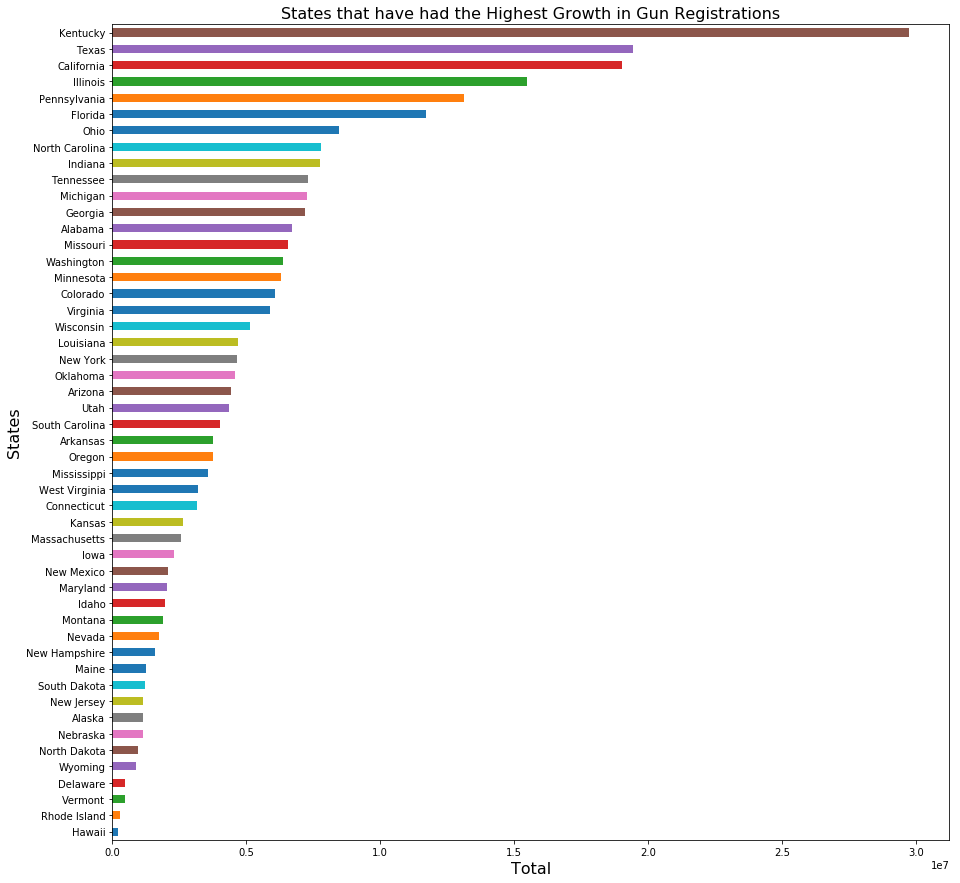

In [49]:
# plotting the data
df_gun_states['totals'].plot(kind='barh', figsize=(15, 15));

# adding title and x,y labels
plt.title('States that have had the Highest Growth in Gun Registrations', fontsize = 16)
plt.xlabel('Total', fontsize = 16)
plt.ylabel('States', fontsize = 16)

#### Kentucky has the highest growth in gun registrations, followed by Texas and California.



### Research Question 2 (What is the type of gun that is most purchased?)

In [50]:
# seperate columns related to gun types
df_gun_type = df_whole[['handgun', 'long_gun', 'other', 'multiple']].sum()

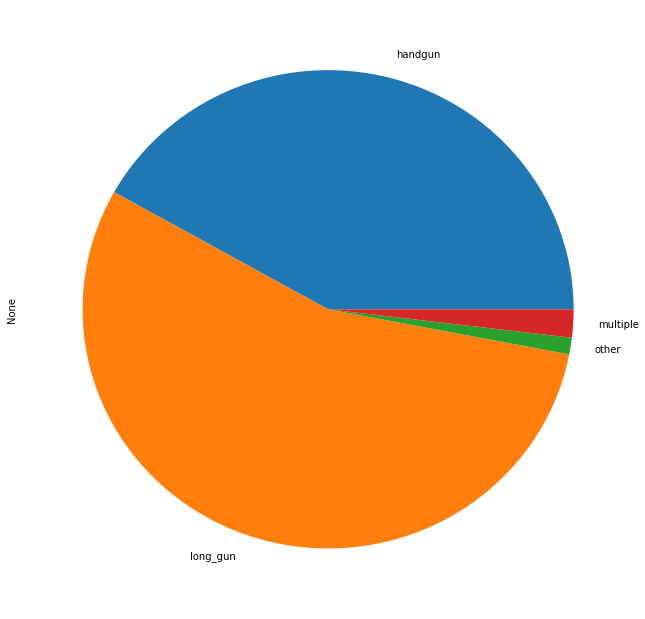

In [51]:
# plotting a pie chart for the gun types
df_gun_type.plot.pie(figsize=(11, 11));

#### Long guns are the most purchased, followed by Hand guns.



### Research Question 3 (What is the overall trend of gun purchases?)

In [52]:
# grouping gun trend data by date for plotting
df_gun_trend = df_gun.groupby(['date'])['totals'].sum()

Text(0,0.5,'Total')

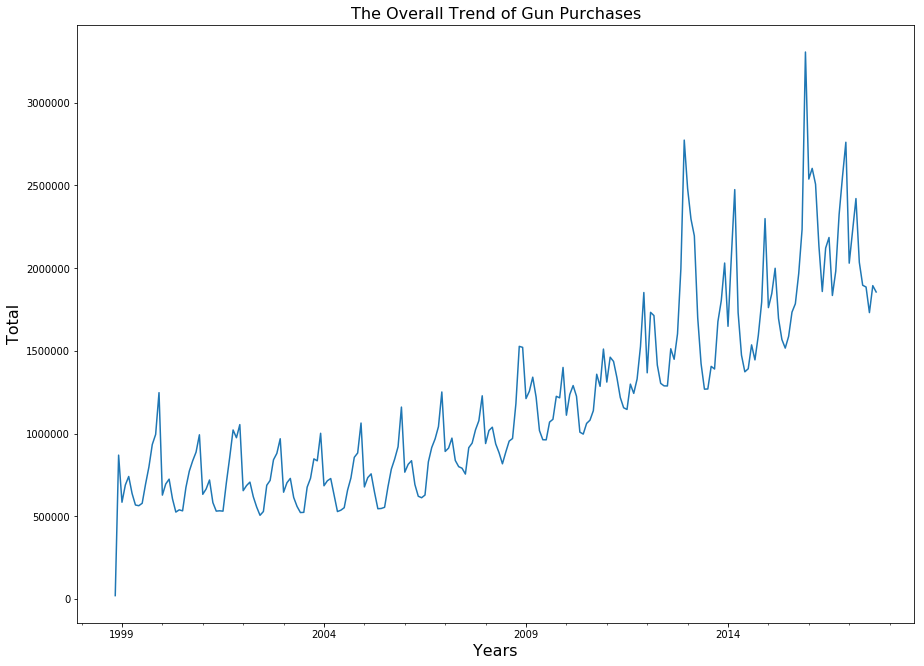

In [53]:
# plotting the timeline trend of gun purchases
df_gun_trend.plot(kind='line', figsize=(15,11));

# adding title and x,y labels
plt.title('The Overall Trend of Gun Purchases', fontsize = 16)
plt.xlabel('Years', fontsize = 16)
plt.ylabel('Total', fontsize = 16)

#### There is annual increase in gun purchases, and specifically in 2016 the increase hit its maximum.



### Research Question 4 (Is there a relation between gun types and population type?)
2016 is chosen since it is the most recent year with enough data to work with

In [54]:
# get columns of whole data to extract columns of gun types and population types
df_whole_columns = list(df_whole.columns.values)

In [55]:
print(df_whole_columns)

['state', 'population_estimates_july_1_2016__(v2016)', 'population_estimates_base_april_1_2010__(v2016)', 'population_percent_change___april_1_2010_(estimates_base)_to_july_1_2016__(v2016)', 'population_census_april_1_2010', 'persons_under_5_years_percent_july_1_2016__(v2016)', 'persons_under_5_years_percent_april_1_2010', 'persons_under_18_years_percent_july_1_2016__(v2016)', 'persons_under_18_years_percent_april_1_2010', 'persons_65_years_and_over_percent__july_1_2016__(v2016)', 'persons_65_years_and_over_percent_april_1_2010', 'female_persons_percent__july_1_2016__(v2016)', 'female_persons_percent_april_1_2010', 'white_alone_percent_july_1_2016__(v2016)', 'black_or_african_american_alone_percent_july_1_2016__(v2016)', 'american_indian_and_alaska_native_alone_percent_july_1_2016__(v2016)', 'asian_alone_percent_july_1_2016__(v2016)', 'native_hawaiian_and_other_pacific_islander_alone_percent_july_1_2016__(v2016)', 'two_or_more_races_percent_july_1_2016__(v2016)', 'hispanic_or_latino_pe

In [56]:
df_gun_vs_population = df_whole[['state', 'white_alone_percent_july_1_2016__(v2016)', 'black_or_african_american_alone_percent_july_1_2016__(v2016)', 'american_indian_and_alaska_native_alone_percent_july_1_2016__(v2016)', 'asian_alone_percent_july_1_2016__(v2016)', 'native_hawaiian_and_other_pacific_islander_alone_percent_july_1_2016__(v2016)', 'two_or_more_races_percent_july_1_2016__(v2016)', 'hispanic_or_latino_percent_july_1_2016__(v2016)', 'white_alone_not_hispanic_or_latino_percent_july_1_2016__(v2016)', 'permit', 'handgun', 'long_gun', 'other', 'multiple', 'totals']]

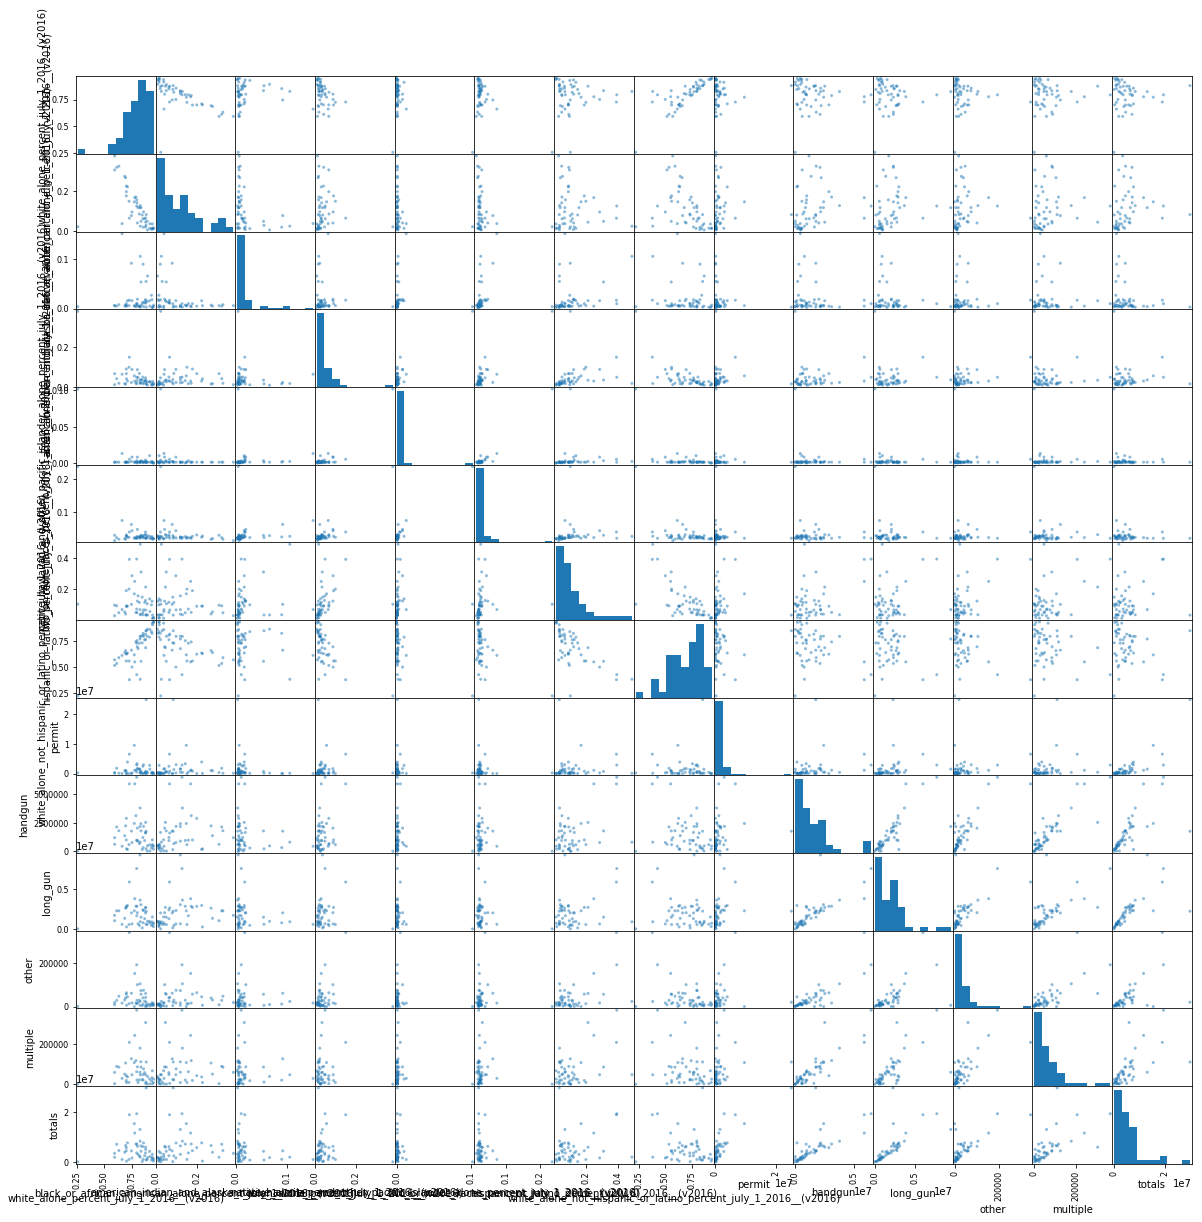

In [57]:
# attempting to spot any relation between population and gun type
pd.plotting.scatter_matrix(df_gun_vs_population, figsize=(20,20));

It is hard to read this plot

In [58]:
# attempting to spotting relations by correlation
df_gun_vs_population.corr()

,white_alone_percent_july_1_2016__(v2016),black_or_african_american_alone_percent_july_1_2016__(v2016),american_indian_and_alaska_native_alone_percent_july_1_2016__(v2016),asian_alone_percent_july_1_2016__(v2016),native_hawaiian_and_other_pacific_islander_alone_percent_july_1_2016__(v2016),two_or_more_races_percent_july_1_2016__(v2016),hispanic_or_latino_percent_july_1_2016__(v2016),white_alone_not_hispanic_or_latino_percent_july_1_2016__(v2016),permit,handgun,long_gun,other,multiple,totals
white_alone_percent_july_1_2016__(v2016),1.000000,-0.581672,0.019501,-0.691376,-0.632297,-0.640469,-0.076947,0.793703,0.074256,-0.072792,-0.033035,-0.084224,0.001165,0.011658
black_or_african_american_alone_percent_july_1_2016__(v2016),-0.581672,1.000000,-0.338299,-0.087782,-0.173707,-0.214354,-0.116067,-0.388680,0.001944,0.206884,0.208729,0.053269,0.105915,0.144326
american_indian_and_alaska_native_alone_percent_july_1_2016__(v2016),0.019501,-0.338299,1.000000,-0.093141,0.006111,0.149936,0.191436,-0.100301,-0.163488,-0.184731,-0.202797,-0.063732,-0.076106,-0.228430
asian_alone_percent_july_1_2016__(v2016),-0.691376,-0.087782,-0.093141,1.000000,0.886218,0.885929,0.230583,-0.633171,-0.012023,0.016865,-0.033529,0.168516,-0.056176,-0.022284
native_hawaiian_and_other_pacific_islander_alone_percent_july_1_2016__(v2016),-0.632297,-0.173707,0.006111,0.886218,1.000000,0.968763,0.024597,-0.465525,-0.056990,-0.144580,-0.170769,-0.076178,-0.123538,-0.140905
two_or_more_races_percent_july_1_2016__(v2016),-0.640469,-0.214354,0.149936,0.885929,0.968763,1.000000,0.052596,-0.487325,-0.087174,-0.135223,-0.175536,-0.037621,-0.101466,-0.160636
hispanic_or_latino_percent_july_1_2016__(v2016),-0.076947,-0.116067,0.191436,0.230583,0.024597,0.052596,1.000000,-0.665590,0.017326,0.428556,0.243978,0.513302,0.439124,0.226362
white_alone_not_hispanic_or_latino_percent_july_1_2016__(v2016),0.793703,-0.388680,-0.100301,-0.633171,-0.465525,-0.487325,-0.665590,1.000000,0.038486,-0.337479,-0.190013,-0.387863,-0.286398,-0.146710
permit,0.074256,0.001944,-0.163488,-0.012023,-0.056990,-0.087174,0.017326,0.038486,1.000000,0.202075,0.201075,0.142806,0.199652,0.814203
handgun,-0.072792,0.206884,-0.184731,0.016865,-0.144580,-0.135223,0.428556,-0.337479,0.202075,1.000000,0.756311,0.827289,0.866688,0.692122


#### We can find from the correlation table that there is a strong correlation between Hispanic and Latino Percent (2016) with Hand guns.
#### we will analyze this more:

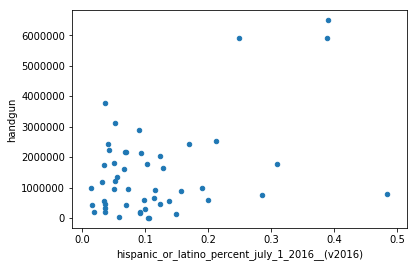

In [59]:
# plotting scatter plot between hispanic or latino percent and handgun permits
df_gun_vs_population.plot(x='hispanic_or_latino_percent_july_1_2016__(v2016)', y='handgun', kind='scatter');

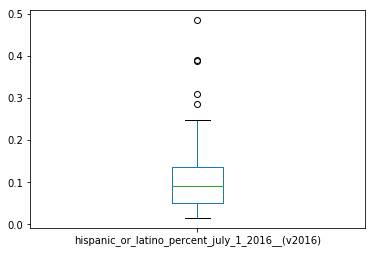

In [60]:
# plotting box plot to get an idea about the hispanic or latino column
df_gun_vs_population['hispanic_or_latino_percent_july_1_2016__(v2016)'].plot(kind='box');

There seems to be some outliers in the data

In [61]:
# seperate handgun into a dataframe for further investigation
df_handgun = df_gun_vs_population.groupby(['state'])['handgun'].sum()

In [62]:
# seperate hispanic or latino and group by state, and multiply by 100 to get the percent values
df_hisp_latin = df_gun_vs_population.groupby(['state'])['hispanic_or_latino_percent_july_1_2016__(v2016)'].sum() * 100

Text(0.5,0,'State')

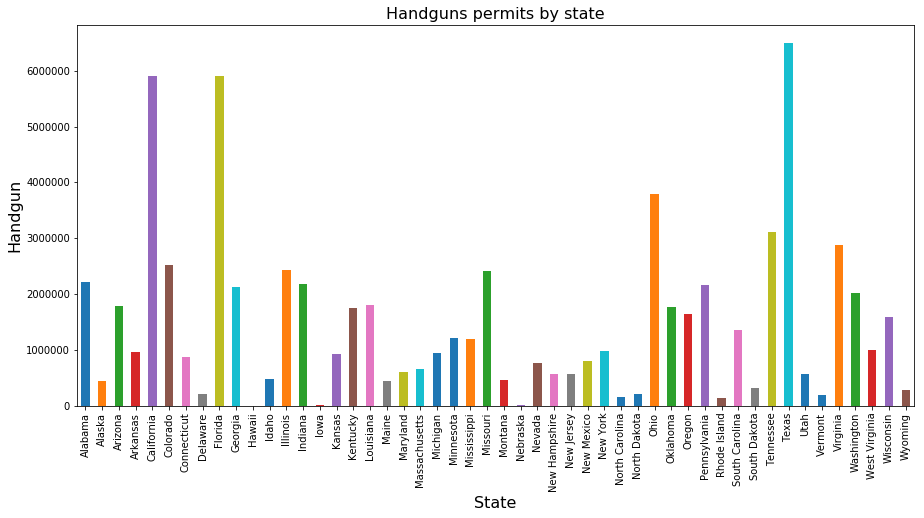

In [63]:
# plotting the handgun permits bar chart
df_handgun.plot(kind='bar', figsize=(15, 7));

# adding title and x,y labels
plt.title('Handguns permits by state', fontsize = 16)
plt.ylabel('Handgun', fontsize = 16)
plt.xlabel('State', fontsize = 16)

Text(0.5,0,'State')

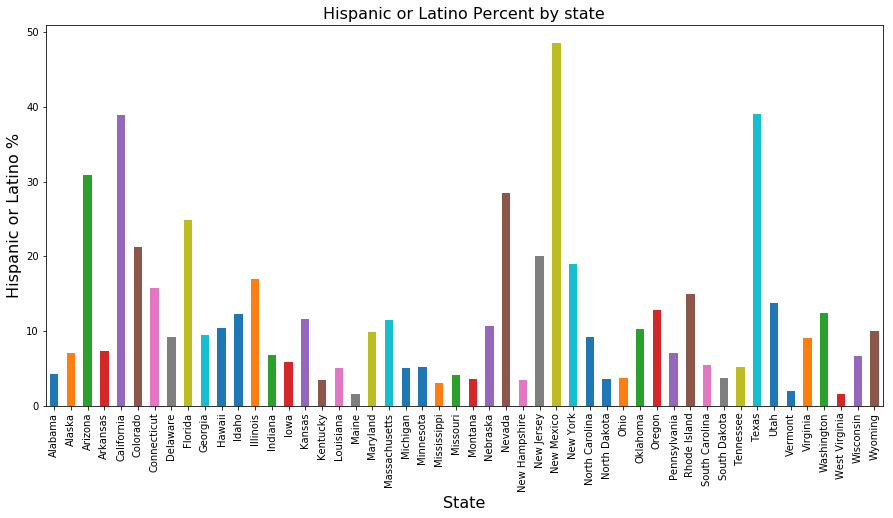

In [64]:
# plotting the handgun permits bar chart
df_hisp_latin.plot(kind='bar', figsize=(15, 7));

# adding title and x,y labels
plt.title('Hispanic or Latino Percent by state', fontsize = 16)
plt.ylabel('Hispanic or Latino %', fontsize = 16)
plt.xlabel('State', fontsize = 16)

#### It appears that handgun permits increase noticably in the states where the Hispanic or Latino Percent is high.
#### For example Texas and California have high percent of Hispanic or Latino and they are also the highest in handgun permits, but that is not the case for New Mexico or Florida.

<a id='conclusions'></a>
## Conclusions

>- Kentucky has the highest growth in gun registrations, followed by Texas and California.
- Long guns are the most purchased, followed by Hand guns.
- There is annual increase in gun purchases, and specifically in 2016 the increase hit its maximum.
- It appears that handgun permits increase noticably in the states where the Hispanic or Latino Percent is high
- Hispanic or Latino Percent sure is not the only factor for increasing handgun sales, but it's an important factor and its effect is undeniable.

### Limitations

> The density of the data is not uniform for all the years included in the study. for example there is more than enough data for the year 2016 and 2010, but that is not the same case for the remaining years from 1998 to 2017. which in turn may affect the accuracy of data related to the remaining years



In [65]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0